In [114]:
import keras
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
keras.__version__

'3.6.0'

In [27]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')

In [28]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [25]:
df_2015_copy = df_2015.drop(['Country','Region','Happiness Rank','Standard Error','Dystopia Residual'],axis=1,inplace=False)
df_2015_copy.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [30]:
df_2016_copy = df_2016.drop(['Country','Region','Happiness Rank','Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual'],axis=1,inplace=False)
df_2016_copy.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [32]:
final_df= pd.concat([df_2015_copy, df_2016_copy], axis=0)
final_df.shape

(315, 7)

In [33]:
final_df.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,5.378949,0.899837,0.892647,0.594054,0.399896,0.140532,0.239957
std,1.141531,0.410780,0.286718,0.240790,0.150684,0.115490,0.130077
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.510000,0.594900,0.739880,0.419645,0.295890,0.061315,0.151430
50%,5.286000,0.973060,0.937930,0.640450,0.413190,0.106130,0.218540
75%,6.269000,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450
max,7.587000,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710


In [36]:
final_df.isnull().sum()

Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

In [41]:
X = final_df.drop(['Happiness Score'], axis=1)
y = final_df['Happiness Score']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, shuffle=True)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(252, 6)
(63, 6)
(252,)
(63,)


In [53]:
## 2 strategies for normalization: Either use standarscaler() object or do it yourself

In [64]:
##1st option

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [63]:
scaler = sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [65]:
##2nd option

In [68]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

In [69]:
X_train = (X_train - mean) / std
X_test = (X_test -mean ) / std

In [70]:
from keras import models, layers

In [84]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])
    
    return model

In [85]:
model = build_model()
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
for i, layer in enumerate(model.layers):
    weights=layer.get_weights()
    print("Layer",str(i))
    print("First set of parameters, size:", len(weights[0]), "x", len(weights[0][0]), "-first value:", weights[0][0][0])
    print("Second set of parameters, size:", "1 x", len(weights[1]), "- first value:", weights[1][0])

Layer 0
First set of parameters, size: 6 x 64 -first value: 0.038219005
Second set of parameters, size: 1 x 64 - first value: 0.0
Layer 1
First set of parameters, size: 64 x 64 -first value: 0.04295729
Second set of parameters, size: 1 x 64 - first value: 0.0
Layer 2
First set of parameters, size: 64 x 1 -first value: -0.11542407
Second set of parameters, size: 1 x 1 - first value: 0.0


In [95]:
# k-fold CV to evaluate to choose hyperparameters (# of epochs used)

In [108]:
k=4
val_samples = len(X_train) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #',i)
    val_data = X_train[i * val_samples: (i+1)*val_samples]
    val_target = y_train[i * val_samples: (i+1)*val_samples]
    
    partial_train_data = np.concatenate([X_train[:i*val_samples], X_train[(i+1)*val_samples:]])
    partial_train_targets = np.concatenate([y_train[:i * val_samples], y_train[(i+1)*val_samples:]])
    
    model=build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_target)
    all_scores.append(val_mae)

processing fold # 0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4158 - mae: 0.5089 
processing fold # 1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3206 - mae: 0.4369
processing fold # 2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5070 - mae: 0.5404  
processing fold # 3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5100 - mae: 0.5755  


In [101]:
all_scores

[0.4494974613189697,
 0.47716376185417175,
 0.4503413140773773,
 0.5310325026512146]

In [102]:
np.mean(all_scores)

0.47700875997543335

In [104]:
from keras import backend as K
K.clear_session()

In [107]:
num_epochs = 250
all_mae_histories = []
val_all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * val_samples: (i + 1) * val_samples]
    val_targets = y_train[i * val_samples: (i + 1) * val_samples]

    partial_train_data = np.concatenate(
        [X_train[:i * val_samples],
         X_train[(i + 1) * val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * val_samples],
         y_train[(i + 1) * val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=4, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)
    val_mae_history = history.history['val_mae']
    val_all_mae_histories.append(val_mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [113]:
avg_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
val_avg_mae_history = [np.mean([x[i] for x in val_all_mae_histories]) for i in range(num_epochs)]

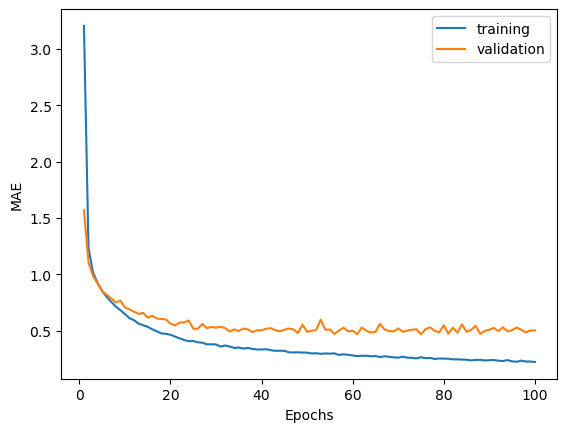

In [117]:
plt.plot(range(1, len(avg_mae_history)+1),avg_mae_history)
plt.plot(range(1, len(val_avg_mae_history)+1), val_avg_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training','validation'])

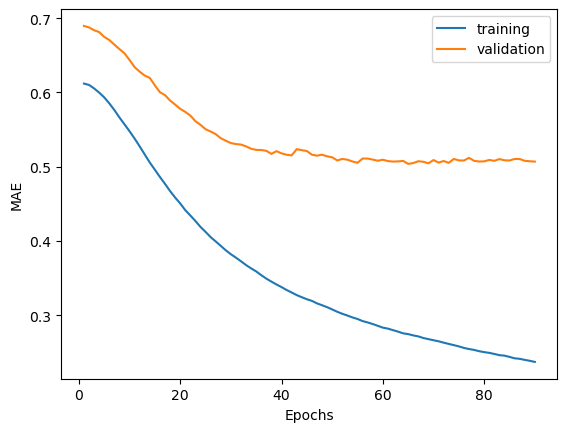

In [122]:
def smooth_curve(points, factor=0.9):
    smoothed_points=[]
    for i in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + i * (1-factor))
        else:
            smoothed_points.append(i)
    return smoothed_points

smooth_mae_history = smooth_curve(avg_mae_history[10:])
val_smooth_mae_history = smooth_curve(val_avg_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+1),smooth_mae_history)
plt.plot(range(1, len(val_smooth_mae_history)+1), val_smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training','validation'])
plt.show()

In [123]:
model = build_model()
model.fit(X_train, y_train, batch_size=4, epochs=60, verbose=1)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

Epoch 1/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 24.6191 - mae: 4.6376
Epoch 2/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 2.4929 - mae: 1.2627
Epoch 3/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 1.6132 - mae: 1.0288
Epoch 4/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.2038 - mae: 0.8750
Epoch 5/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.9679 - mae: 0.7858
Epoch 6/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 0.9319 - mae: 0.7711
Epoch 7/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 0.7017 - mae: 0.6638
Epoch 8/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 0.7772 - mae: 0.6810
Epoch 9/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.6539 - mae: 0.6239
Epoch 10/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.5155 - mae: 0.5565
Epoch 11/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 0.4494 - mae: 0.5181
Epoch 12/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 0.4645 - mae: 0.5407
Epoch 13/60
63/63 ━━━━━━

In [124]:
print(test_mae_score)
print(test_mse_score)

0.46876925230026245
0.29897433519363403
